<!-- <p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p> -->



<h1 align=center><font size = 6>Predictive Model Development with King County House Sale Data</font></h1>

## Dataset - House Sales in King County, USA 


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## 0. IMPORT LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression

## 1. GENERAL INSPECTION AND DATA CLEANING

Read the csv as a dataframe <code>house</code> and inspect the first 5 rows


In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
house=pd.read_csv(file_name, index_col = 0)
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house.shape

(21613, 21)

### General inspection
Look for missing data

In [4]:
house.isnull().any()

id               False
date             False
price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Notice that missing data happen at columns <code>bedrooms</code> and <code>bathrooms</code>. Further inspect if the missing data should be 0.

In [5]:
sorted(house.bedrooms.unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan, 8.0, 9.0, 10.0, 11.0, 33.0]

In [6]:
house[house.bedrooms.isnull() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,NaN,NaN,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,NaN,NaN,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,NaN,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,NaN,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,NaN,NaN,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,NaN,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,NaN,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,NaN,NaN,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,NaN,NaN,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,NaN,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


Noticed that some multifloor houses have <code>NaN</code> bedrooms. It is not likely that they have 0 bedrooms so the missing data were caused by not having inputs in the first place. There are 13 rows have missing data on <code>bedrooms</code>. It wouldn't affect the overall prediction model very much to just drop these rows. 

*Also noticed at lease one house has <code>33.0</code> bedrooms. Check if it is possibly a data entry error.

In [7]:
house[house.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33.0,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


It's not likely that one floor on a 6000 sqft lot can have 33 bedrooms. Will drop this row. 

In [8]:
house.drop([15870], inplace=True)
house.shape

(21612, 21)

Repeat same inspection with the <code>bathrooms</code> column

In [9]:
sorted(house.bathrooms.unique())

[0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 nan,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.5,
 7.75,
 8.0]

In [10]:
house.bathrooms.isnull().sum()

10

### Handling the missing data

Although few rows were affacted by missing data on <code>bathrooms</code>, for practice purpose, try replace these missing values with the average number of bathrooms of the dataset

In [11]:
mean=round(house.bathrooms.mean(), 0)
house.bathrooms.replace(np.nan, mean, inplace = True)

In [12]:
house.dropna(axis=0, subset = ['bedrooms'], inplace = True)

Becasue <code>id</code> and <code>date</code> are not going to be used in this analysis. The two columns will be dropped. 

In [13]:
house.drop(['id', 'date'], axis = 1, inplace = True)

### Inspect data types

In [14]:
house.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 2. VISUALIZING AND ANALYZING DATA

### Histograms of dataframe
Use histogram to exam the distribution of data in each column. This feature is also accessable on Kaggle.

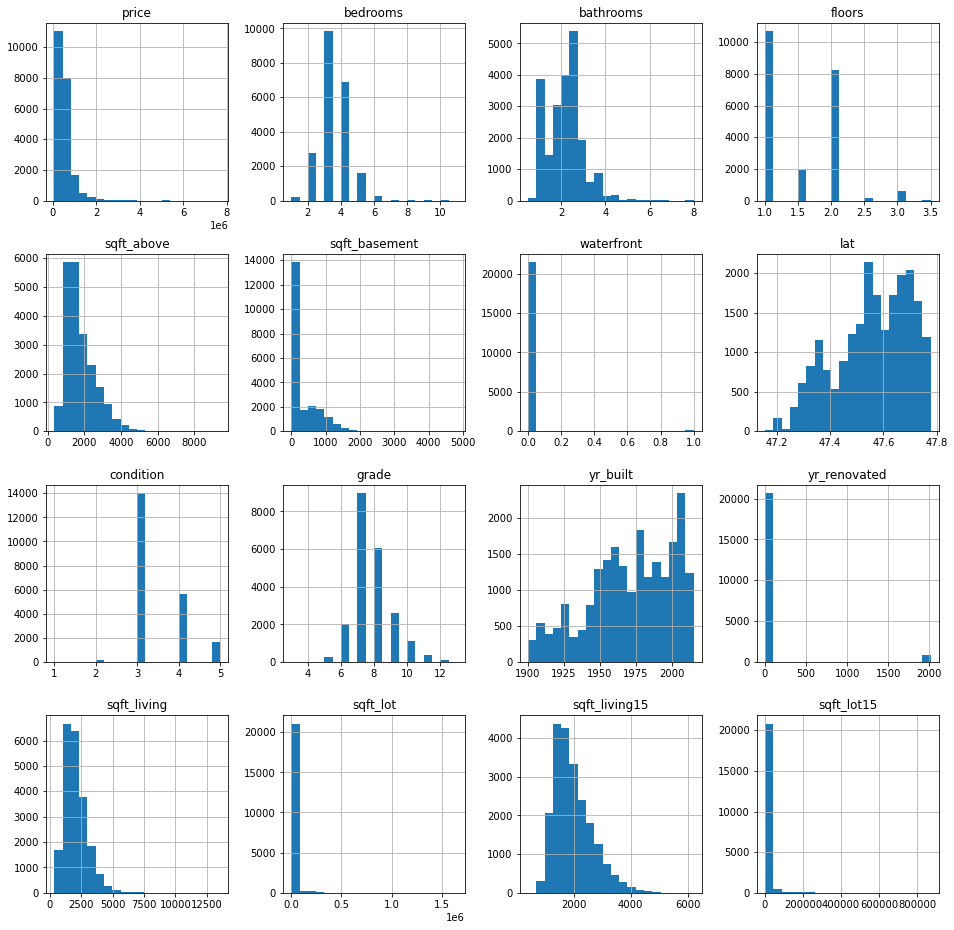

In [15]:
selected_features = house[['price','bedrooms','bathrooms','floors',
                       'sqft_above','sqft_basement','waterfront', 'lat', 
                       'condition', 'grade','yr_built', 'yr_renovated',
                       'sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']]
h = selected_features.hist(bins = 20, figsize = (16, 16))

### Pairplot visualisation

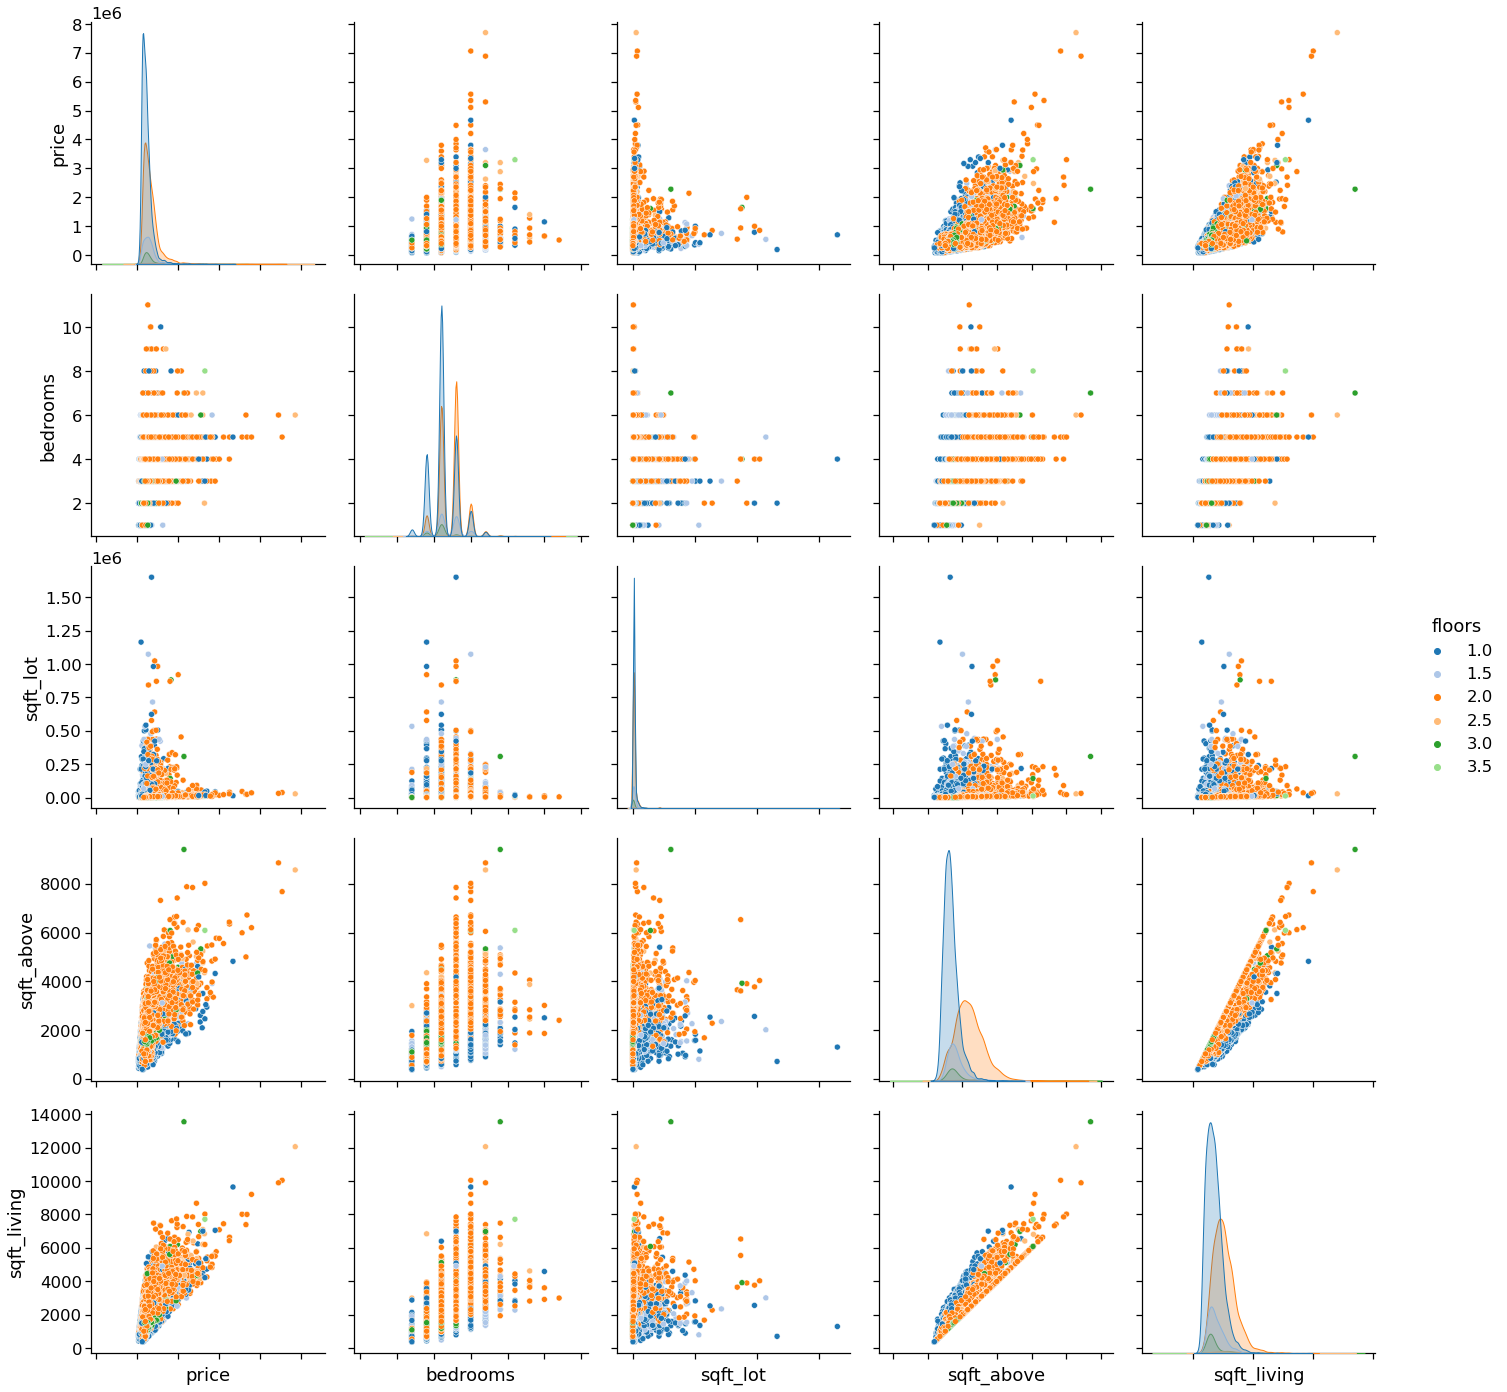

In [16]:
with sns.plotting_context("notebook",font_scale=1.5):
    pp = sns.pairplot(house[['price','bedrooms','sqft_lot','sqft_above','sqft_living','floors']], hue='floors', palette='tab20', height=4)
pp.set(xticklabels=[])

<p>From the pairplots, we can see linear distribution of the data points show in several plots. This indicates that we should include these features when developing the model.</p>
<p><code>price</code> vs. <code>sqft_living</code></p>
<p><code>price</code> vs. <code>sqft_above</code></p>
<p><code>sqft_living</code> vs. <code>bedrooms</code></p>
<p><code>sqft_livng</code> vs. <code>sqft_above</code></p>

### Pearson Correlation Heatmap

Another way of looking at the correlation between the features is 

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

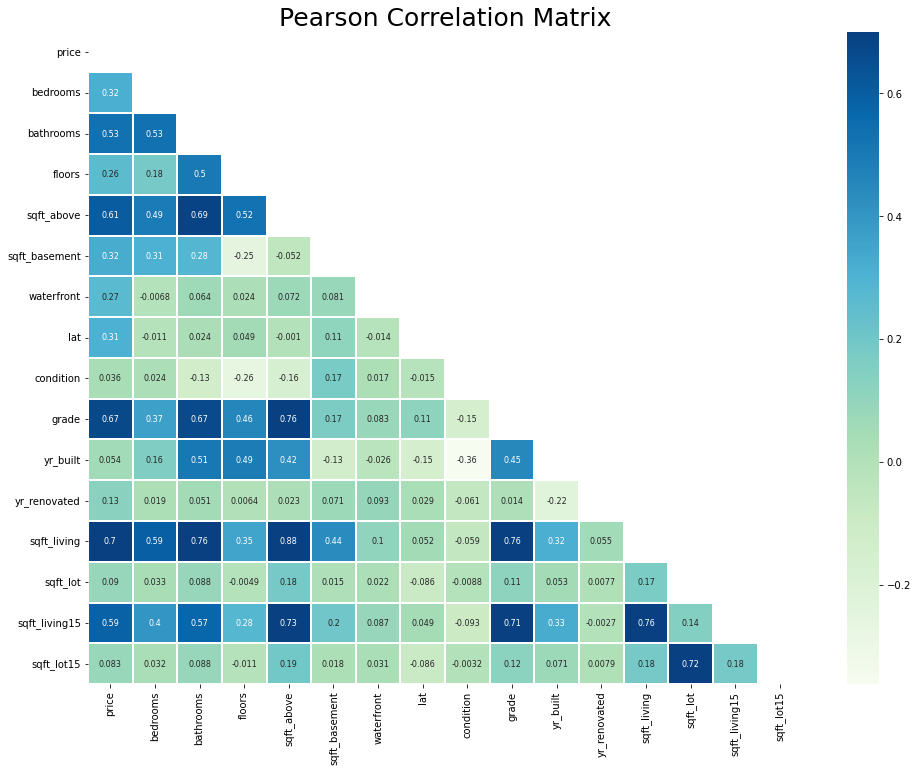

In [17]:
corr_matrix = selected_features.corr(method='pearson')

mask = np.zeros_like(corr_matrix, dtype = bool)                # 
mask[np.triu_indices_from(mask)] = True                        #

plt.figure(figsize = (16,12))
plt.title("Pearson Correlation Matrix", fontsize = 25)
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":8},      # show corr.coeff on each tile 
            linecolor='w', linewidths=0.25,                     # white line in between tiles
            vmax=0.7, cmap="GnBu",                              # give any corr.coeff greater than 0.7 the darkest color
            mask = mask)

<p><code>price</code> has a strong correlation with <code>sqft_living, grade, sqft_above, bathrooms</code>, and a weak correlation with <code>bedrooms, sqrt_basement, waterfront, floors</code>.</p>

<p>In next session, we will develop a multiple linear regression model to predict house price. </P>


# 3. Multiple Linear Regression Model Development

In [18]:
model = LinearRegression()
features =["sqft_living","grade","sqft_above", "bathrooms", "bedrooms", "sqft_basement", "lat", "waterfront", "floors"]  

In [19]:
model.fit(house[features], house['price'])
model.score(house[features], house['price'])

0.6435974657184572

~65.76 % of the variation of price is explained by this multiple linear regression model.

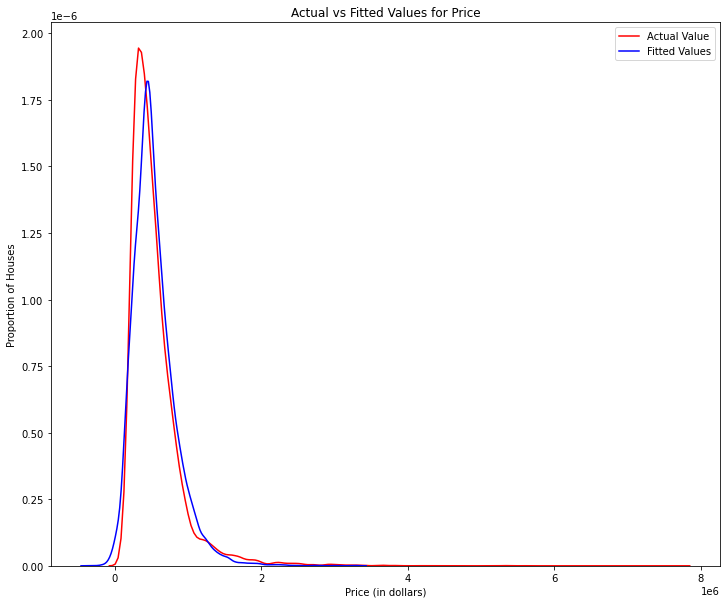

In [20]:
Y_hat = model.predict(house[features])

plt.figure(figsize=(12, 10))

ax1 = sns.kdeplot(house['price'], color="r") 
sns.kdeplot(Y_hat, color="b", ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend(['Actual Value', 'Fitted Values'])

plt.show()
plt.close()